In [1]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [2]:
# %load https://gist.githubusercontent.com/rogerallen/1583593/raw/e78a0c47bac18ce810ae3b75a32b102435413128/us_state_abbrev.py
# United States of America Python Dictionary to translate States,
# Districts & Territories to Two-Letter codes and vice versa.
#
# https://gist.github.com/rogerallen/1583593
#
# Dedicated to the public domain.  To the extent possible under law,
# Roger Allen has waived all copyright and related or neighboring
# rights to this code.

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

# thank you to @kinghelix and @trevormarburger for this idea
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

# Simple test examples
if __name__ == '__main__':
    print("Wisconin --> WI?", us_state_abbrev['Wisconsin'] == 'WI')
    print("WI --> Wisconin?", abbrev_us_state['WI'] == 'Wisconsin')


Wisconin --> WI? True
WI --> Wisconin? True


In [3]:
# load newest virus data and population data
url = 'https://raw.githubusercontent.com/COVID19Tracking/covid-tracking-data/master/data/states_current.csv'
data = pd.read_csv(url)
url1 = 'https://raw.githubusercontent.com/Frank-Xu-Huaze/Medium/master/COVID/2019Population.csv'
population = pd.read_csv(url1)
# only choosing 50 states + DC
state_list = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
              'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
              'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
              'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
              'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
data = data[data.state.isin(state_list)].reset_index()
# add a column of complete name of the states
data['State'] = data.state.map(abbrev_us_state)
data = data[data['State'].notna()]
# add column of positive rate
data['positiverate'] = data.positive/data.total
data = data.merge(population, on = 'State')
# add column of test rate
data['testrate'] = data.total/data['2019 population']

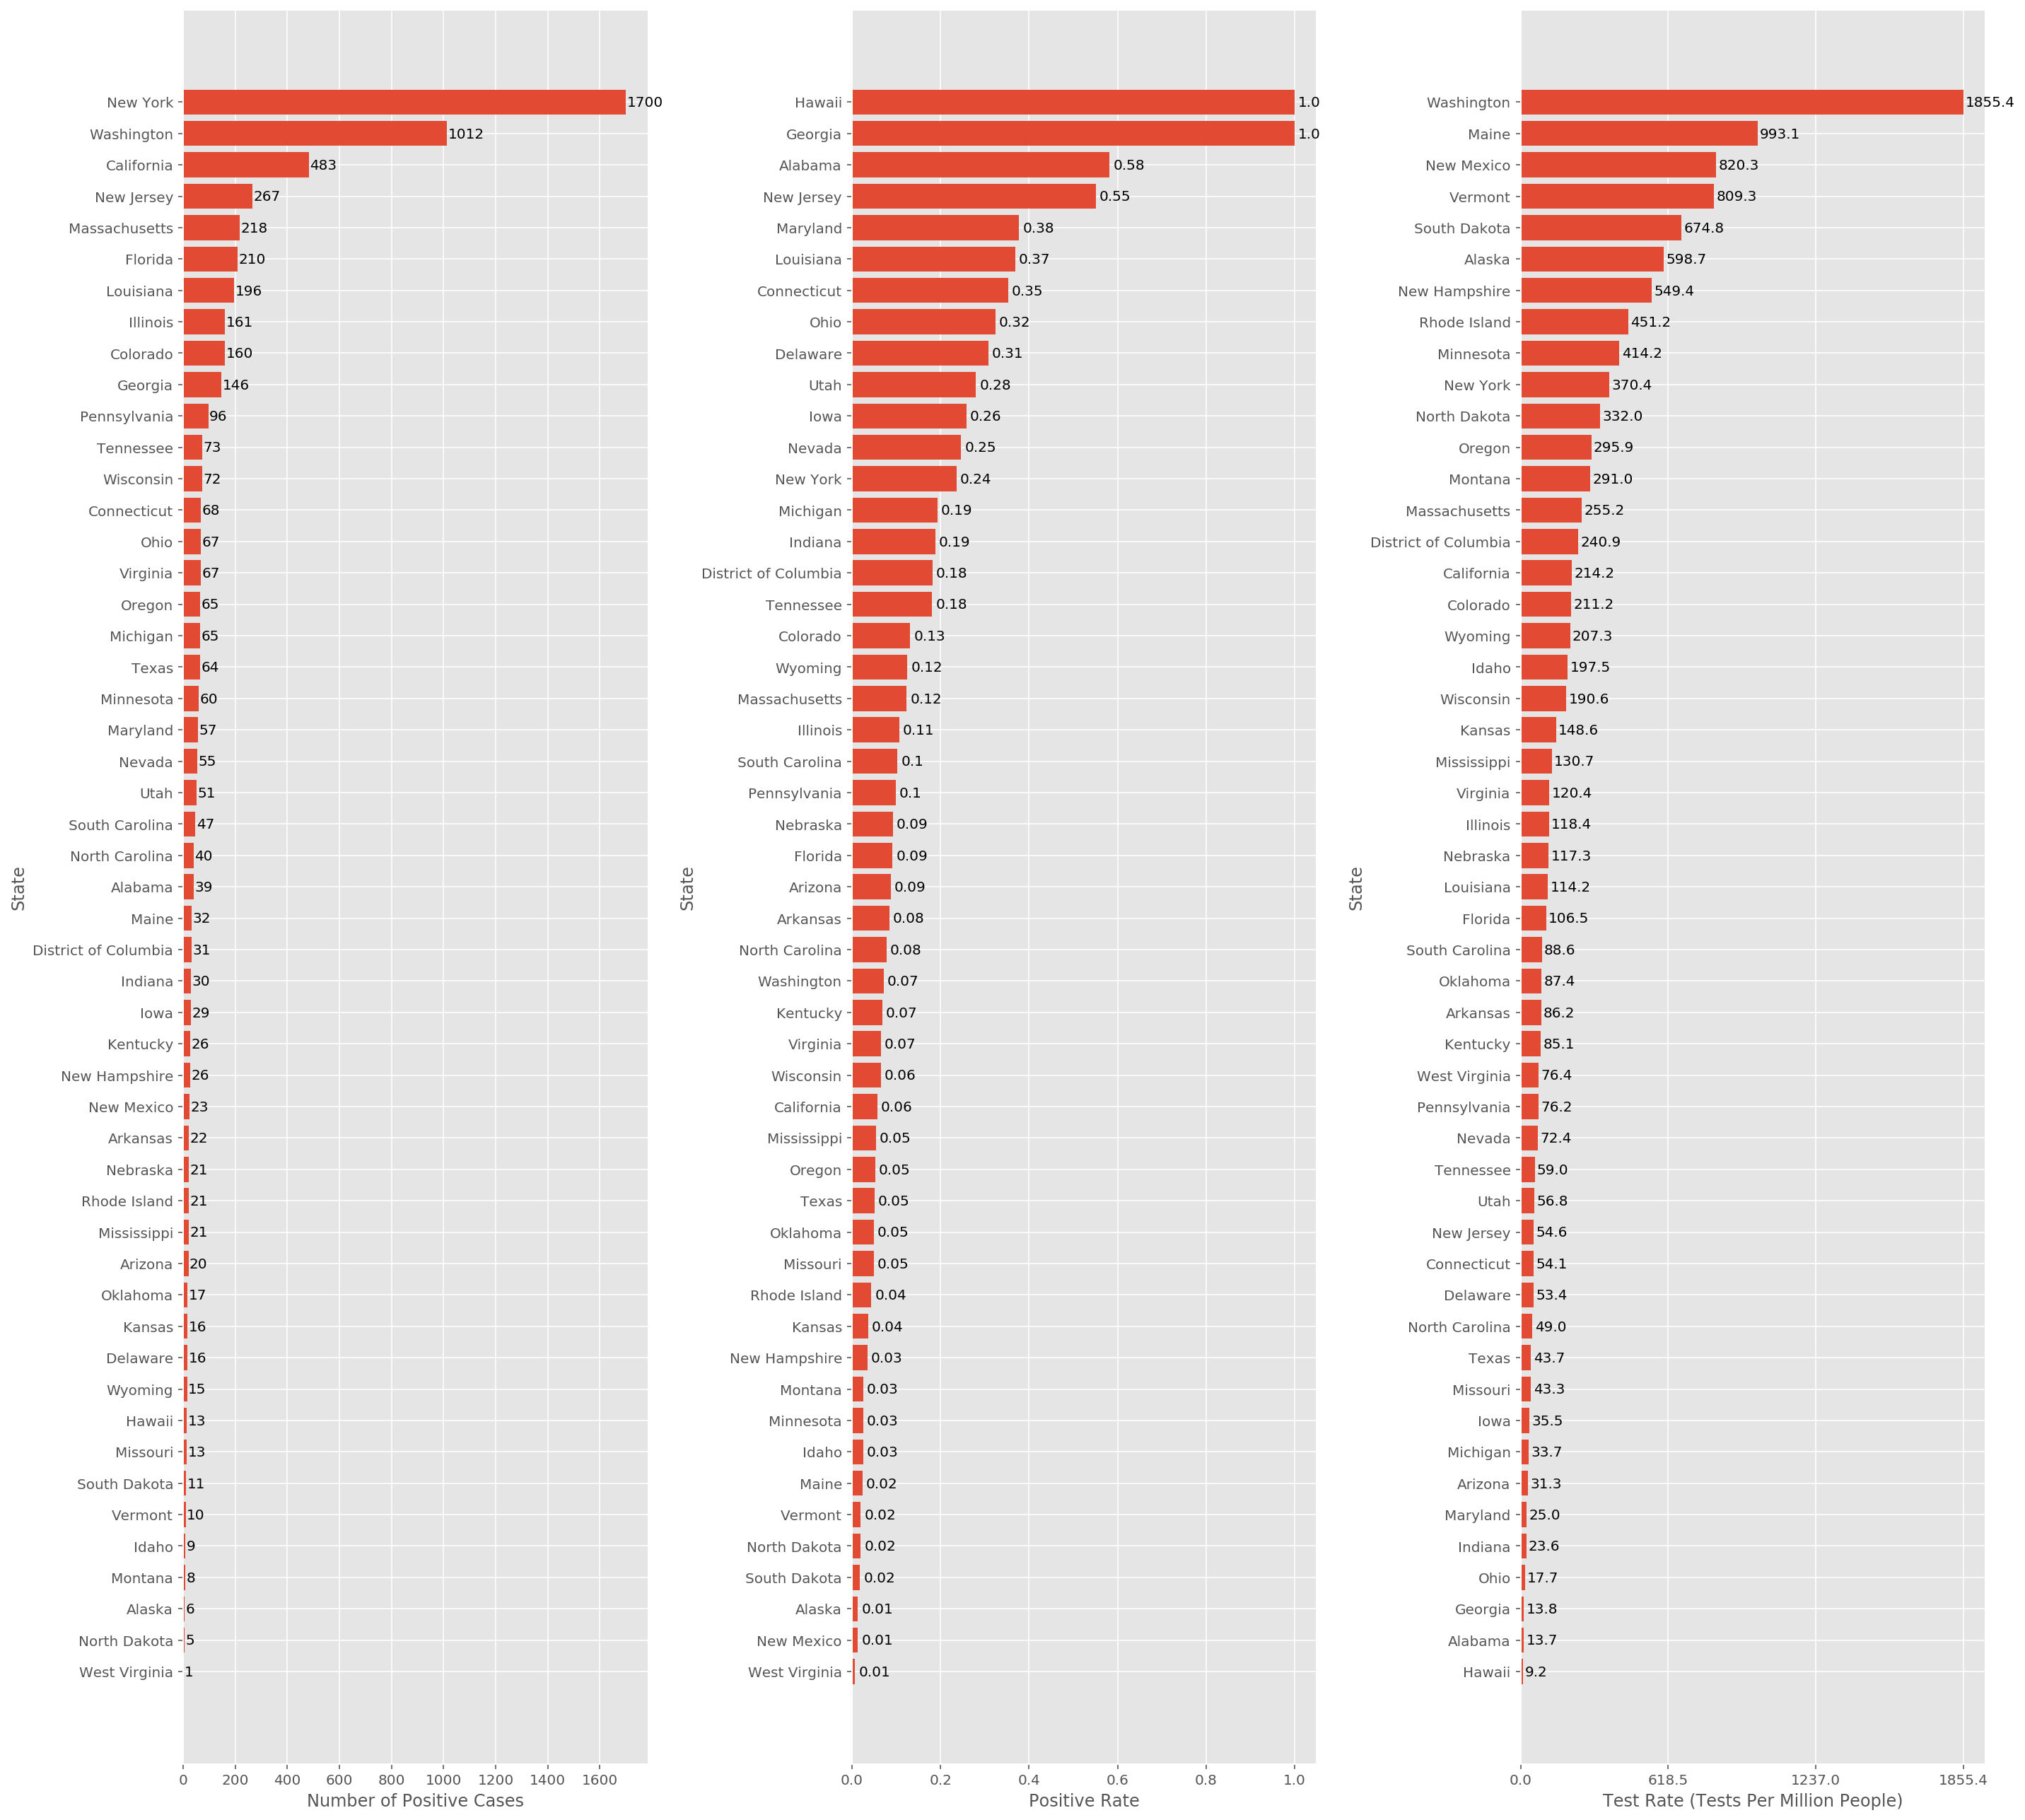

In [4]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20, 18))
# plotting positive cases
plt.subplot(131)
data = data.sort_values('positive')
plt.barh(np.arange(len(data.State)), data.positive)
plt.yticks(np.arange(len(data.State)), data.State)
plt.ylabel('State'); plt.xlabel('Number of Positive Cases')
for i, v in enumerate(data.positive):
    plt.text(v + 4, i - .14, str(v))
# plotting positive rate    
plt.subplot(132)
data = data.sort_values('positiverate')
plt.barh(np.arange(len(data.State)), data.positiverate)
plt.yticks(np.arange(len(data.State)), data.State)
plt.ylabel('State'); plt.xlabel('Positive Rate')
for i, v in enumerate(data.positiverate):
    plt.text(v + .008, i - .14, str(round(v,2)))
# plotting test rate
plt.subplot(133)
data = data.sort_values('testrate')
plt.barh(np.arange(len(data.State)), data.testrate)
plt.yticks(np.arange(len(data.State)), data.State)
m = data.testrate.max()
plt.xticks(np.linspace(0,m,4), np.linspace(0,m*1e6,4).round(1))
plt.ylabel('State'); plt.xlabel('Test Rate (Tests Per Million People)')
for i, v in enumerate(data.testrate):
    plt.text(v+.00001, i - .14, str(round(v*1e6,1)))
plt.tight_layout()
plt.show()

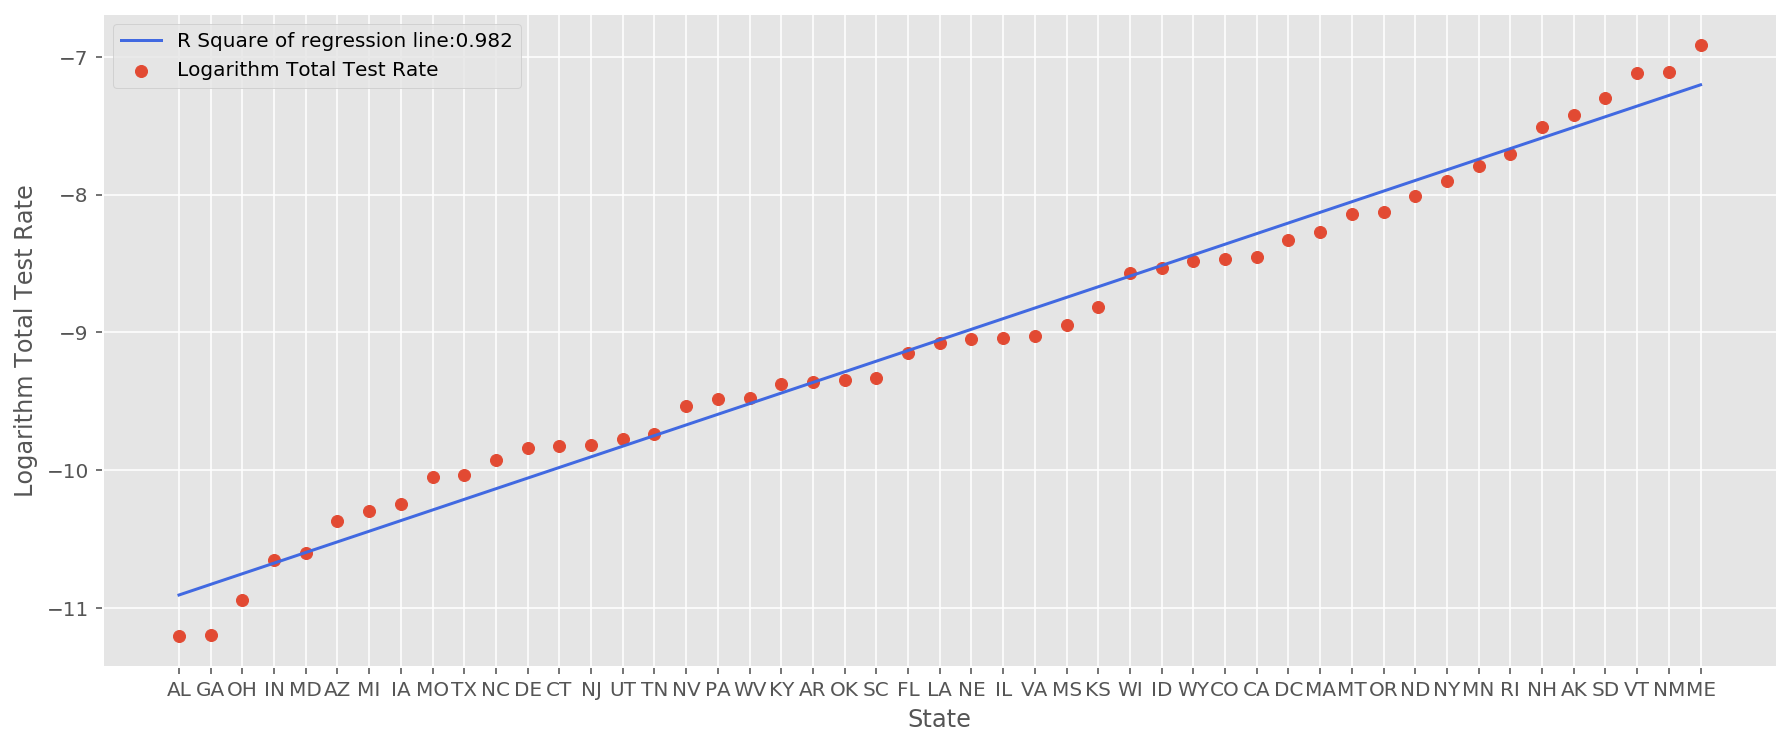

In [5]:
# plotting logarithm transformed test rate
temp = data.sort_values('testrate').iloc[1:-1]
fig = plt.figure(figsize=(15, 6))
x = np.arange(len(temp.State))
y = np.log(temp.testrate)
plt.scatter(x, y, label='Logarithm Total Test Rate')
m,b = np.polyfit(x, y, 1)
r_squared = 1 - (sum((y - (m * x + b))**2) / ((len(y) - 1) * np.var(y, ddof=1)))
plt.plot(x, m*x+b, label='R Square of regression line:' + str(round(r_squared,3)), color = 'royalblue')
plt.xticks(x, temp.state)
plt.xlabel('State'); plt.ylabel('Logarithm Total Test Rate')
plt.legend(fontsize=10)
plt.show()

In [6]:
# fetch state party affiliation data
url2 = 'https://raw.githubusercontent.com/Frank-Xu-Huaze/Medium/master/COVID/PoliticalPartiesbyState.csv'
party = pd.read_csv(url2, header = 2, skipfooter = 19, engine='python')
party = party.iloc[1:,[0,3]]
party = party.rename(columns={"Location": "State", "State House Majority Political Affiliation": "Political Affiliation"})
party.loc[party.State == 'District of Columbia', 'Political Affiliation'] = 'Democrat'
party.loc[party.State == 'Nebraska', 'Political Affiliation'] = 'Republican'
data = data.merge(party, on = 'State')
data.loc[data['Political Affiliation'] == 'Republican', 'color'] = 'r' 
data.loc[data['Political Affiliation'] == 'Democrat', 'color'] = 'b' 

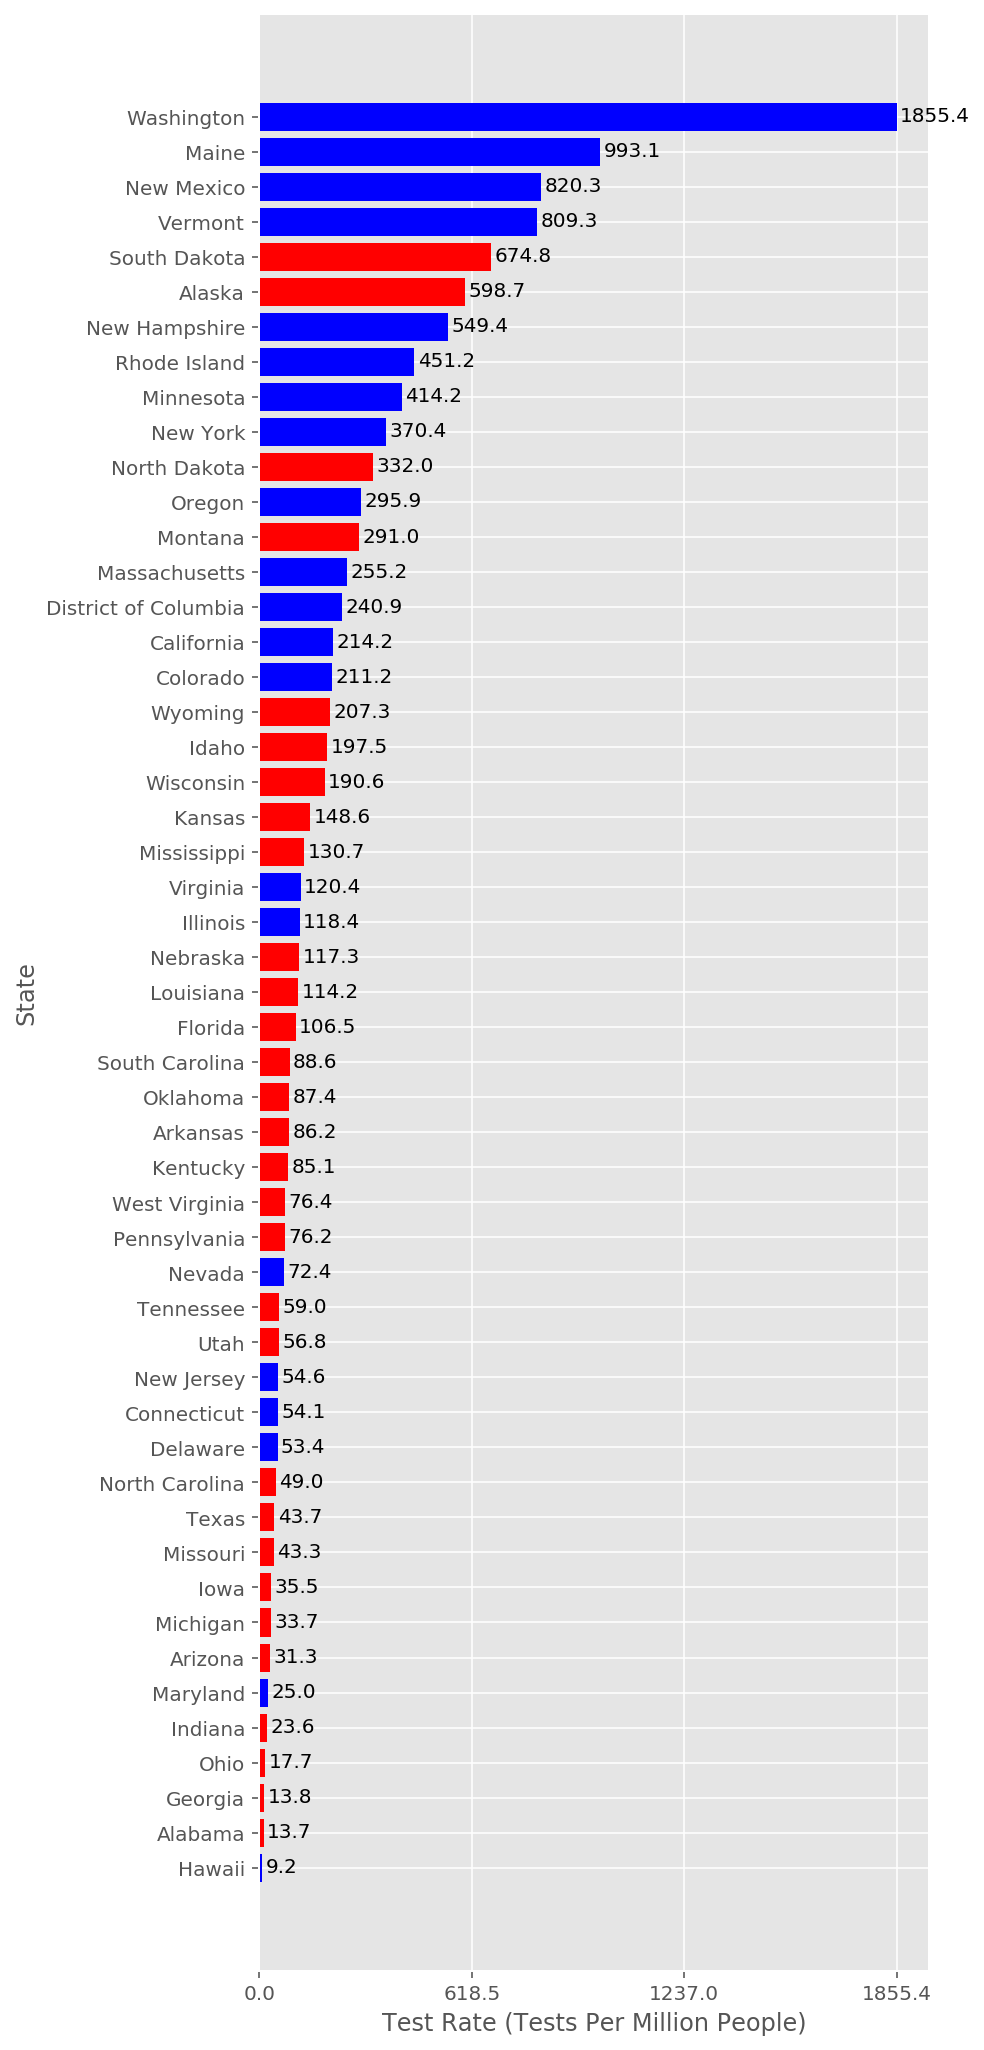

In [7]:
data = data.sort_values('testrate')
fig = plt.figure(figsize=(6, 18))
plt.style.use('ggplot')
plt.barh(np.arange(len(data.State)), data.testrate, color = data.color)
plt.yticks(np.arange(len(data.State)), data.State)
m = data.testrate.max()
plt.xticks(np.linspace(0,m,4), np.linspace(0,m*1e6,4).round(1))
plt.ylabel('State'); plt.xlabel('Test Rate (Tests Per Million People)')
for i, v in enumerate(data.testrate):
    plt.text(v+.00001, i - .14, str(round(v*1e6,1)))
plt.show()

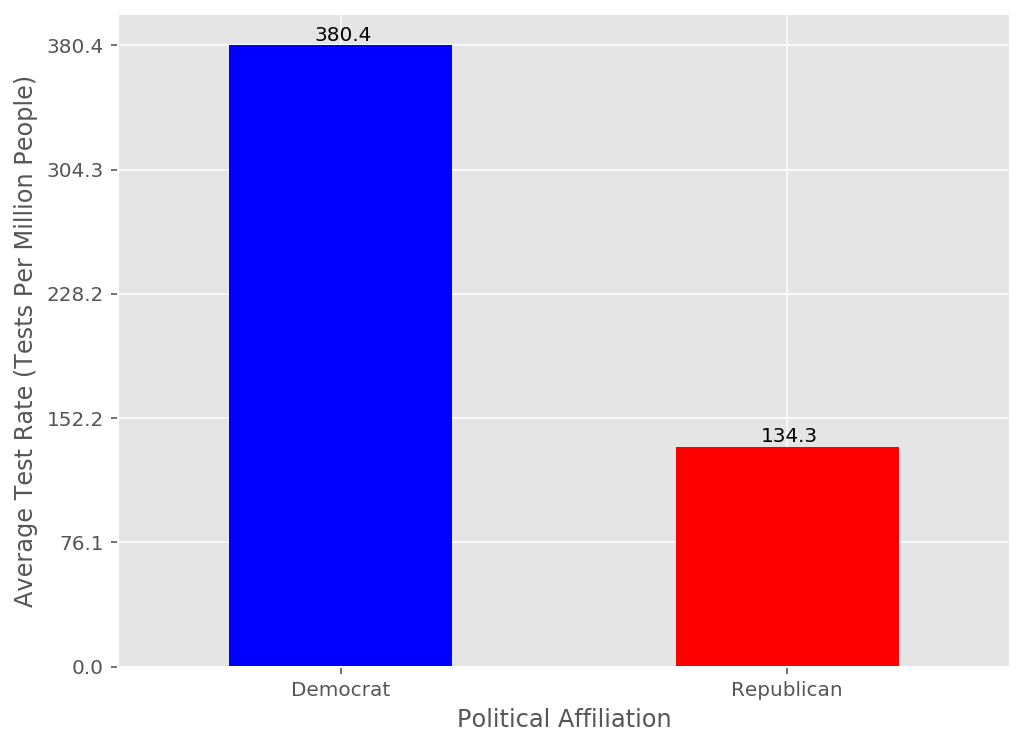

In [8]:
fig = plt.figure(figsize=(8, 6))
comparison = data.groupby('Political Affiliation')['testrate'].mean()
comparison.plot.bar(color = ['b', 'r'])
for i, v in enumerate(comparison):
    plt.text(i - .06, v + .000003, str(round(v*1e6,1)))
plt.ylabel('Average Test Rate (Tests Per Million People)')
m = comparison.max()
plt.xticks(rotation=0); plt.yticks(np.linspace(0,m,6), np.linspace(0,m*1e6,6).round(1))
plt.show()

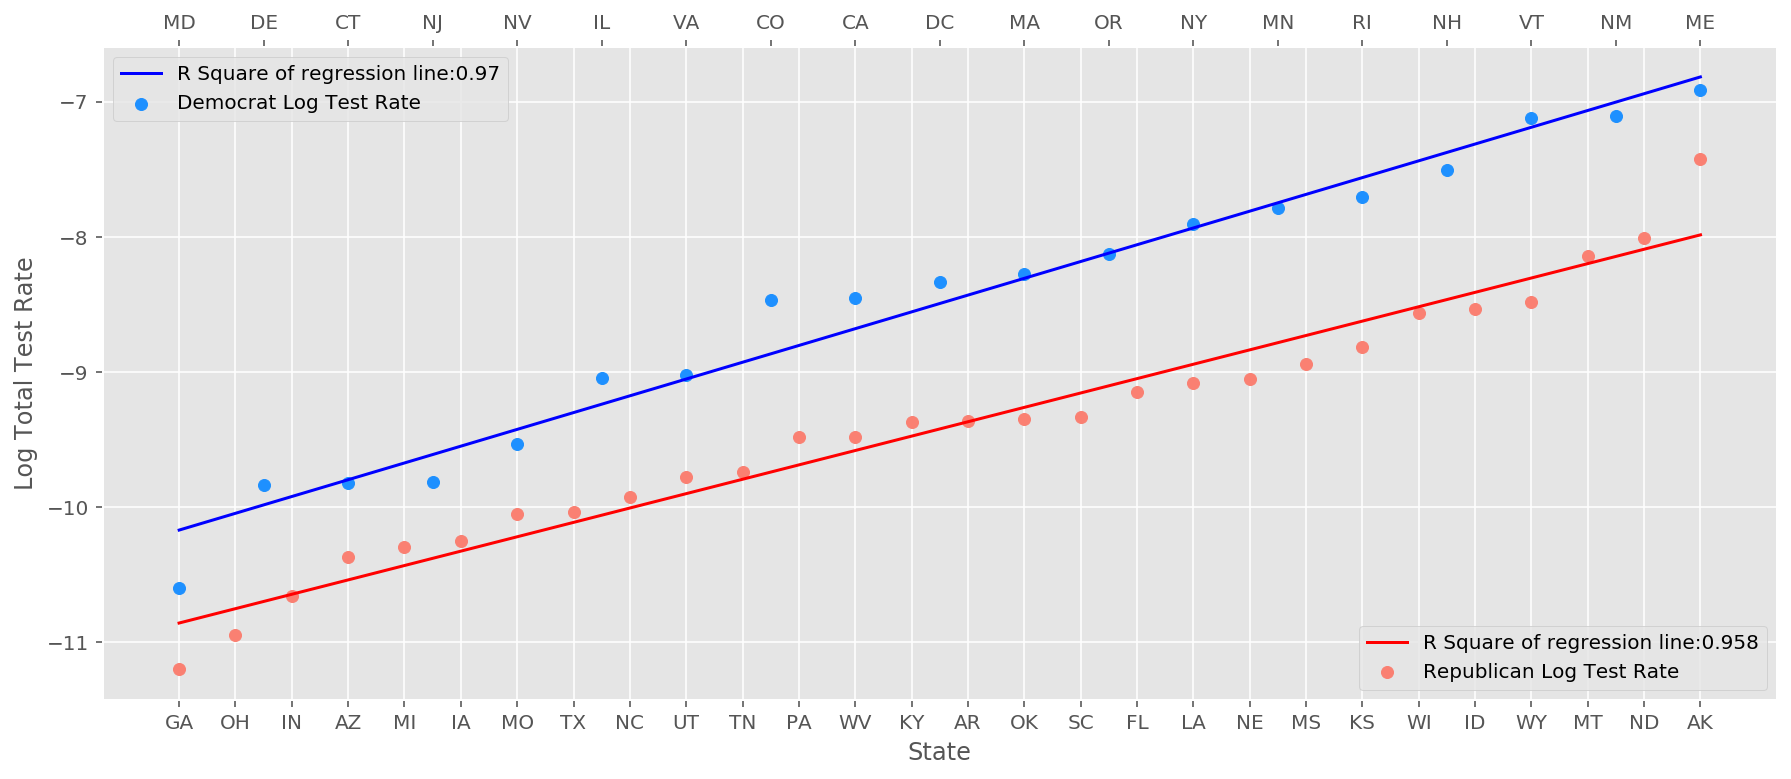

In [9]:
# logarithm transformed state affiliation data by party
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(111)
temp = data.sort_values('testrate')[data.color == 'r'].iloc[1:-1]
x = np.arange(len(temp.State))
y = np.log(temp.testrate)
ax1.scatter(x, y, label='Republican Log Test Rate', color = 'salmon')
m,b = np.polyfit(x, y, 1)
r_squared = 1 - (sum((y - (m * x + b))**2) / ((len(y) - 1) * np.var(y, ddof=1)))
ax1.plot(x, m*x+b, label='R Square of regression line:' + str(round(r_squared,3)), color = 'r')
ax1.set_xticks(x)
ax1.set_xticklabels(temp.state)
ax1.legend(fontsize=10, loc = 'lower right')

ax2 = ax1.twiny()
temp = data.sort_values('testrate')[data.color == 'b'].iloc[1:-1]
x = np.arange(len(temp.State))
y = np.log(temp.testrate)
ax2.scatter(x, y, label='Democrat Log Test Rate', color = 'dodgerblue')
m,b = np.polyfit(x, y, 1)
r_squared = 1 - (sum((y - (m * x + b))**2) / ((len(y) - 1) * np.var(y, ddof=1)))
ax2.plot(x, m*x+b, label='R Square of regression line:' + str(round(r_squared,3)), color = 'b')
ax2.set_xticks(x)
ax2.set_xticklabels(temp.state)
ax2.legend(fontsize=10, loc = 'upper left')

ax1.set_xlabel('State'); ax1.set_ylabel('Log Total Test Rate'); plt.grid(False)
plt.show()

In [10]:
# fetch GDP data
url3 = 'https://raw.githubusercontent.com/Frank-Xu-Huaze/Medium/master/COVID/GDPbyState.csv'
GDP = pd.read_csv(url3)
GDP.State = GDP.State.str.strip()
data = data.merge(GDP.iloc[:,[0,8]], on = 'State')
# fetch Household Income data
url4 = 'https://raw.githubusercontent.com/Frank-Xu-Huaze/Medium/master/COVID/HouseholdIncomeByState.csv'
income = pd.read_csv(url4)
data = data.merge(income, on="State")
# fetch enplanement data
url5 = 'https://raw.githubusercontent.com/Frank-Xu-Huaze/Medium/master/COVID/EnplanementsByState.csv'
flight = pd.read_csv(url5)
flight = pd.DataFrame(flight.groupby('ST')['CY 18 Enplanements'].sum()).reset_index()
flight = flight.rename(columns={"ST": "state", "CY 18 Enplanements": "enplanements"})
data = data.merge(flight, on = 'state')

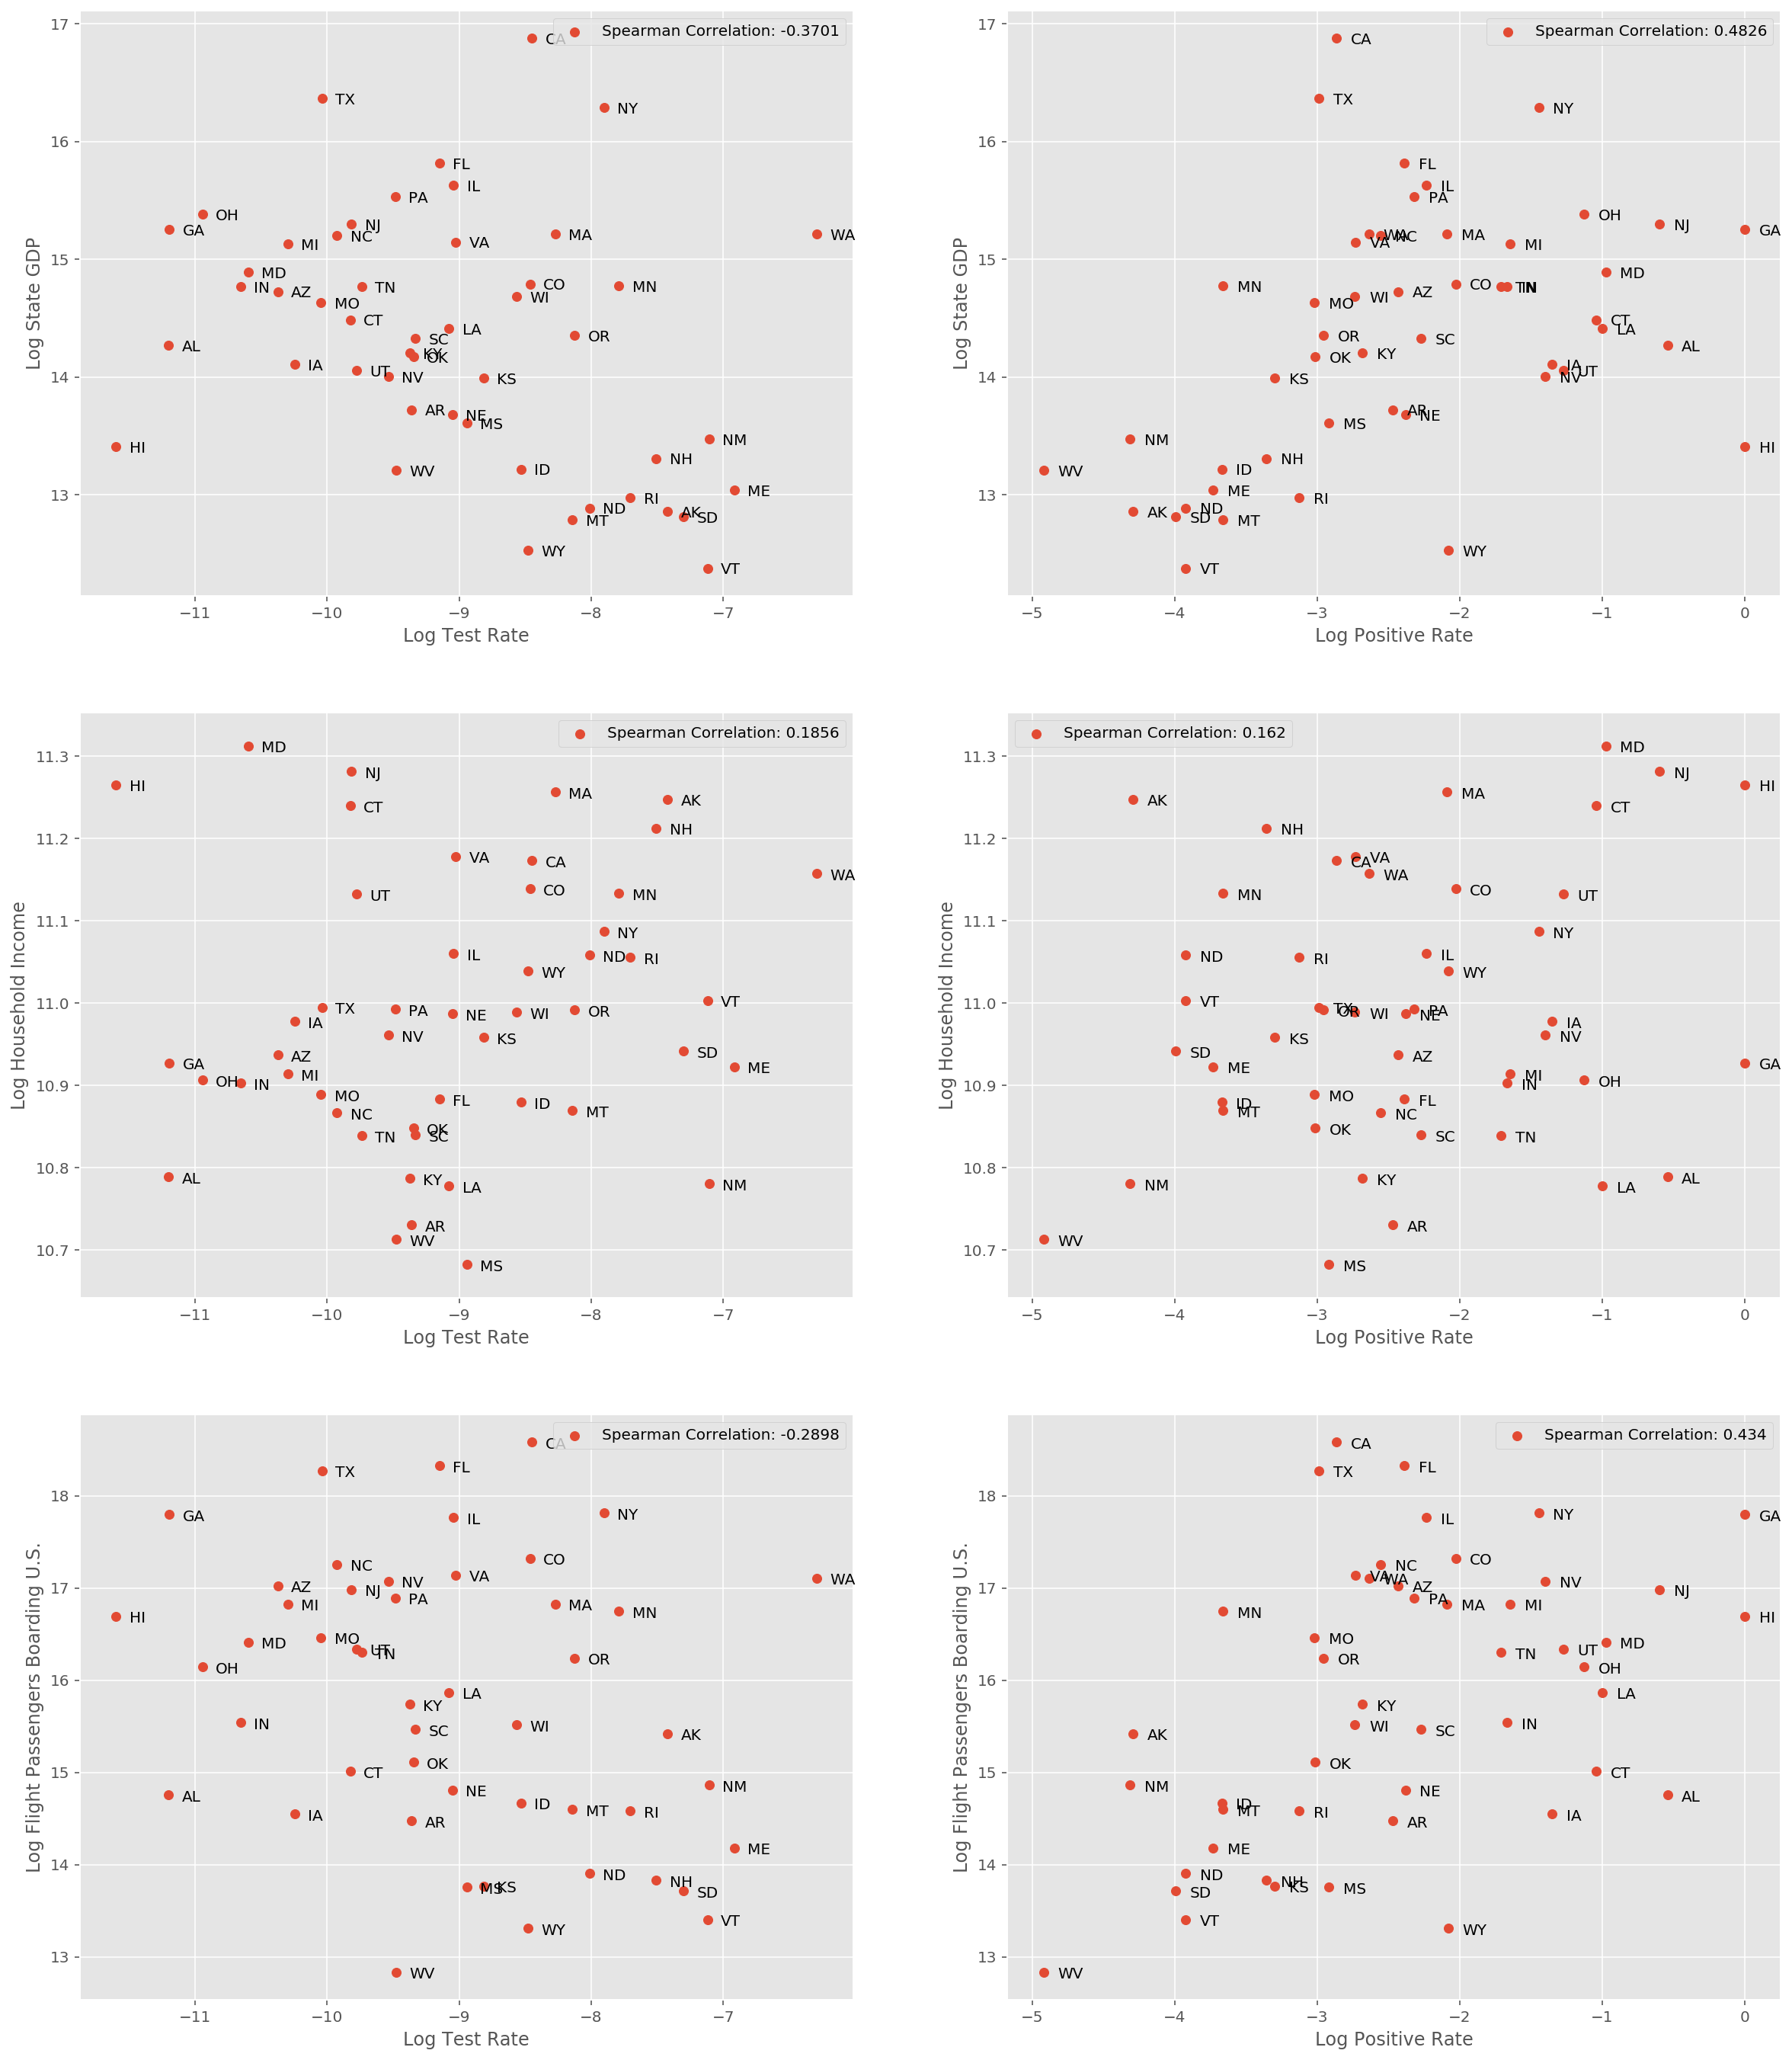

In [11]:
# plotting factors and rates' correlation
fig = plt.figure(figsize=(20, 24))
plt.subplot(321)
cor = round(spearmanr(data.testrate, data.total_GDP)[0],4)
plt.scatter(np.log(data.testrate), np.log(data.total_GDP), label = 'Spearman Correlation: {}'.format(cor))
for i, v in enumerate(data.state):
    plt.text(np.log(data.testrate[i])+.1, np.log(data.total_GDP[i])-0.05, str(v))
plt.xlabel('Log Test Rate'); plt.ylabel('Log State GDP')
plt.legend()

plt.subplot(322)
cor = round(spearmanr(data.positiverate, data.total_GDP)[0],4)
plt.scatter(np.log(data.positiverate), np.log(data.total_GDP), label = 'Spearman Correlation: {}'.format(cor))
for i, v in enumerate(data.state):
    plt.text(np.log(data.positiverate[i])+.1, np.log(data.total_GDP[i])-0.05, str(v))
plt.xlabel('Log Positive Rate'); plt.ylabel('Log State GDP')
plt.legend()

plt.subplot(323)
cor = round(spearmanr(data.testrate, data.HouseholdIncome)[0],4)
plt.scatter(np.log(data.testrate), np.log(data.HouseholdIncome), label = 'Spearman Correlation: {}'.format(cor))
for i, v in enumerate(data.state):
    plt.text(np.log(data.testrate[i])+.1, np.log(data.HouseholdIncome[i])- .008, str(v))
plt.xlabel('Log Test Rate'); plt.ylabel('Log Household Income')
plt.legend()

plt.subplot(324)
cor = round(spearmanr(data.positiverate, data.HouseholdIncome)[0],4)
plt.scatter(np.log(data.positiverate), np.log(data.HouseholdIncome), label = 'Spearman Correlation: {}'.format(cor))
for i, v in enumerate(data.state):
    plt.text(np.log(data.positiverate[i])+.1, np.log(data.HouseholdIncome[i])- .008, str(v))
plt.xlabel('Log Positive Rate'); plt.ylabel('Log Household Income')
plt.legend()

plt.subplot(325)
cor = round(spearmanr(data.testrate, data.enplanements)[0],4)
plt.scatter(np.log(data.testrate), np.log(data.enplanements), label = 'Spearman Correlation: {}'.format(cor))
for i, v in enumerate(data.state):
    plt.text(np.log(data.testrate[i])+.1, np.log(data.enplanements[i])-0.07, str(v))
plt.xlabel('Log Test Rate'); plt.ylabel('Log Flight Passengers Boarding U.S.')
plt.legend()

plt.subplot(326)
cor = round(spearmanr(data.positiverate, data.enplanements)[0],4)
plt.scatter(np.log(data.positiverate), np.log(data.enplanements), label = 'Spearman Correlation: {}'.format(cor))
for i, v in enumerate(data.state):
    plt.text(np.log(data.positiverate[i])+.1, np.log(data.enplanements[i])-0.07, str(v))
plt.xlabel('Log Positive Rate'); plt.ylabel('Log Flight Passengers Boarding U.S.')
plt.legend()

plt.show()

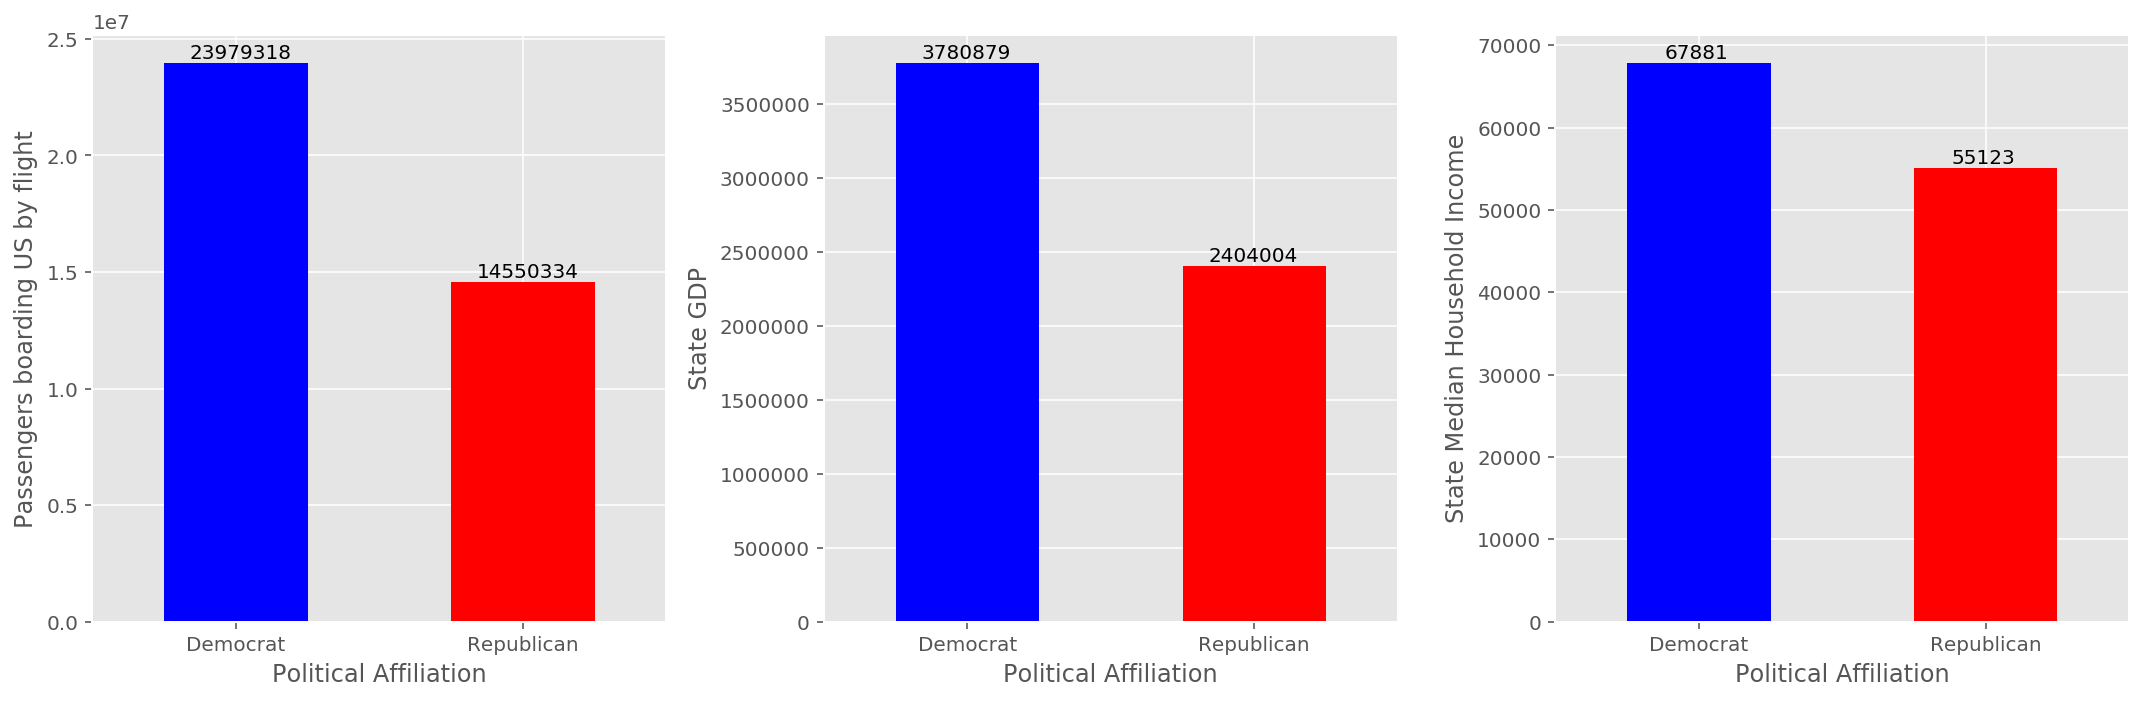

In [12]:
# plotting factors versus parties
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
comparison = data.groupby('Political Affiliation')['enplanements'].mean()
comparison.plot.bar(color = ['b', 'r'])
for i, v in enumerate(comparison):
    plt.text(i - .16, v + 200000, str(round(v)))
plt.ylabel('Passengers boarding US by flight')
m = comparison.max()
plt.xticks(rotation=0); 

plt.subplot(132)
comparison = data.groupby('Political Affiliation')['total_GDP'].mean()
comparison.plot.bar(color = ['b', 'r'])
for i, v in enumerate(comparison):
    plt.text(i - .16, v + 30000, str(round(v)))
plt.ylabel('State GDP')
m = comparison.max()
plt.xticks(rotation=0); 

plt.subplot(133)
comparison = data.groupby('Political Affiliation')['HouseholdIncome'].mean()
comparison.plot.bar(color = ['b', 'r'])
for i, v in enumerate(comparison):
    plt.text(i - .12, v + 500, str(round(v)))
plt.ylabel('State Median Household Income')
m = comparison.max()
plt.xticks(rotation=0); 
plt.tight_layout()
plt.show()